In [1]:
ls

drive/  sample_data/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/CNN

/content/drive/MyDrive/CNN


In [4]:
ls

flowers/  flowers1.h5  Flowers-Dataset.zip  Untitled0.ipynb


In [5]:
pwd

'/content/drive/MyDrive/CNN'

In [6]:
!unzip /content/drive/MyDrive/CNN/Flowers-Dataset.zip

Archive:  /content/drive/MyDrive/CNN/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524

*Image Augmentation*

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale =1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)

In [9]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/flowers/Training",target_size=(64,64),class_mode="categorical",
                                            batch_size=24)

Found 2617 images belonging to 3 classes.


In [11]:
x_test = train_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/flowers/Testing",target_size=(64,64),class_mode="categorical",
                                            batch_size=24)

Found 1717 images belonging to 2 classes.


 *Model Building*

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [13]:
model = Sequential()

In [14]:
model.add(Convolution2D(32,(3,3),activation = "relu",input_shape=(64,64,3)))

In [15]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(300,activation='relu'))

In [18]:
model.add(Dense(300,activation='relu'))

In [19]:
model.add(Dense(4, activation = "Softmax"))

In [20]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"],optimizer='adam')

In [21]:
len(x_train)

110

In [22]:
len(x_test)

72

In [41]:
model.fit(x_train, epochs = 5, validation_data=x_test, steps_per_epoch=len(x_train), validation_steps=len(x_test))

Epoch 1/5


InvalidArgumentError: ignored

In [24]:
model.save("flowers1.h5")

*Testing the Model*

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [26]:
model = load_model("/content/drive/MyDrive/CNN/flowers1.h5")

In [47]:
img = image.load_img("/content/drive/MyDrive/CNN/flowers/Training/daisy/10172379554_b296050f82_n.jpg",target_size=(64,64))
img1 =image.load_img("/content/drive/MyDrive/CNN/flowers/dandelion/10617191174_9a01753241_n.jpg",target_size=(64,64))                                                                                                        

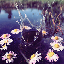

In [52]:
img

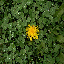

In [53]:
img1


In [29]:
x =image.img_to_array(img)

In [68]:
x=image.img_to_array(img1)

In [55]:
x

array([[[ 26.,  40.,   7.],
        [ 69., 101.,  28.],
        [ 48.,  85.,  16.],
        ...,
        [ 49.,  78.,  30.],
        [  0.,   0.,   5.],
        [ 45.,  73.,  24.]],

       [[ 69.,  98.,  32.],
        [ 90.,  94.,  57.],
        [ 68.,  97.,  49.],
        ...,
        [ 52.,  82.,  22.],
        [ 25.,  51.,   4.],
        [ 52.,  69.,  35.]],

       [[ 67., 100.,  47.],
        [ 59.,  80.,  24.],
        [ 71., 100.,  44.],
        ...,
        [  0.,   3.,   0.],
        [ 29.,  48.,  18.],
        [ 36.,  58.,  20.]],

       ...,

       [[ 63.,  96.,  43.],
        [ 99., 128.,  82.],
        [ 25.,  52.,   1.],
        ...,
        [ 66.,  84.,  32.],
        [ 63.,  86.,  32.],
        [ 78.,  97.,  52.]],

       [[ 91., 111.,  62.],
        [ 24.,  40.,   4.],
        [ 88., 114.,  67.],
        ...,
        [ 36.,  62.,  14.],
        [ 60.,  83.,  27.],
        [ 58.,  73.,  30.]],

       [[ 31.,  50.,   5.],
        [  1.,  17.,   4.],
        [ 72.,  

In [65]:
model.predict(x)

array([[7.9052390e-34, 2.9954156e-17, 0.0000000e+00, 1.0000000e+00]],
      dtype=float32)

In [57]:
x.ndim

3

In [58]:
x = np.expand_dims(x,axis = 0)

In [59]:
x.ndim

4

In [60]:
pred = model.predict(x)

In [61]:
pred

array([[7.9052390e-34, 2.9954156e-17, 0.0000000e+00, 1.0000000e+00]],
      dtype=float32)

In [62]:
labels = ["daisy","dandelion","rose"]

In [63]:
np.argmax(pred)

3

In [64]:
labels[2]

'rose'

*OpenCv*

In [69]:
import cv2

In [72]:
# Reading the Image

img = cv2.imread("/content/drive/MyDrive/CNN/flowers/Training/rose/11944957684_2cc806276e.jpg")


In [71]:
img

array([[[ 84,  76,  69],
        [ 86,  78,  71],
        [ 87,  79,  72],
        ...,
        [ 79, 130, 116],
        [ 79, 131, 114],
        [ 80, 132, 115]],

       [[ 85,  76,  67],
        [ 86,  77,  68],
        [ 87,  78,  69],
        ...,
        [ 79, 129, 117],
        [ 78, 128, 116],
        [ 78, 129, 115]],

       [[ 85,  76,  67],
        [ 85,  76,  67],
        [ 84,  75,  66],
        ...,
        [ 80, 129, 121],
        [ 79, 129, 119],
        [ 80, 130, 120]],

       ...,

       [[ 84, 140,  99],
        [ 81, 137,  96],
        [ 77, 134,  95],
        ...,
        [ 82,  86,  74],
        [ 81,  82,  72],
        [ 80,  78,  70]],

       [[ 81, 137,  94],
        [ 78, 136,  95],
        [ 77, 134,  95],
        ...,
        [ 84,  85,  75],
        [ 82,  79,  74],
        [ 79,  75,  74]],

       [[ 77, 136,  92],
        [ 77, 135,  94],
        [ 77, 135,  94],
        ...,
        [ 78,  78,  72],
        [ 76,  72,  71],
        [ 74,  67,  70]]

In [73]:
import matplotlib.pyplot as plt


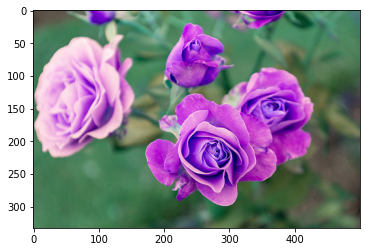

In [74]:
plt.imshow(img)

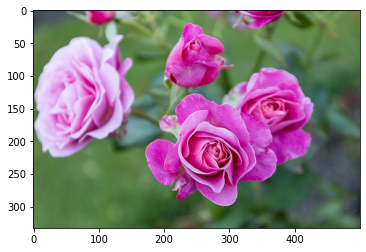

In [82]:
a = plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [85]:
b = cv2.imwrite("abc.jpg",img)

In [86]:
b

True

In [87]:
import numpy as np

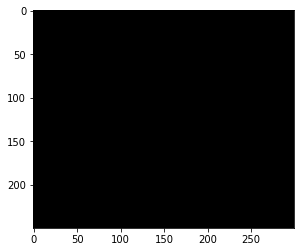

In [91]:
img1 = np.zeros((250,300,3))
plt.imshow(img1)

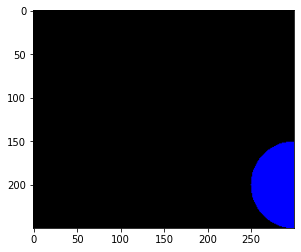

In [94]:
plt.imshow(cv2.circle(img1,(300,200),50,(0,0,255),-1))

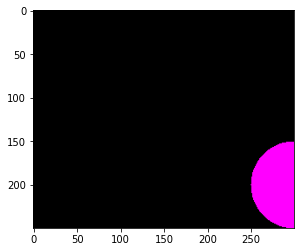

In [95]:
plt.imshow(cv2.circle(img1,(300,200),50,(24,0,255),-1))

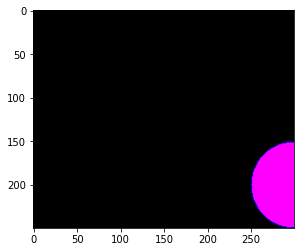

In [96]:
plt.imshow(cv2.circle(img1,(300,200),50,(0,0,255),1))

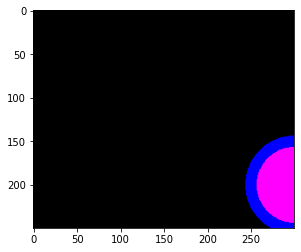

In [97]:
plt.imshow(cv2.circle(img1,(300,200),50,(0,0,255),11))

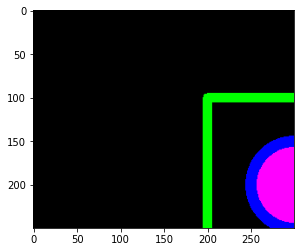

In [104]:
plt.imshow(cv2.rectangle(img1,(200,300),(400,100),(0,233,0),10))